# Modelado de Temas

In [1]:
import pandas as pd 
import numpy as np 
from bertopic import BERTopic
import re

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saulp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
stop = stopwords.words("spanish")

def remove_stopwords_punc(texts):
    pattern = r'\b(?:\d+|\w*\d\w*)\b' # elimina digitos y palabrs alfanumericas
    text = re.sub(pattern,'', texts)
    words = text.split()
    final = []
    final = " ".join([word for word in words if word.lower() not in stop]) # remove stopwords
    final = "".join([word for word in final if word not in string.punctuation]) #remove punctuation
    return final

# obtener frecuencias de las palabras en los clusters
def get_cluster_frequencies(cluster_index):
    if cluster_index >= K:
        return None
    term_frequencies = model.cluster_centers_[cluster_index]
    sorted_terms = centroids[cluster_index]
    frequencies = {terms[i]: term_frequencies[i] for i in sorted_terms}
    return frequencies

# generar nubes de palabras
def display_worldcloud(frequencies,name):
    wordcloud = WordCloud(background_color="white", max_words=50)
    wordcloud.generate_from_frequencies(frequencies)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(name+'.png')
    plt.show()
    
# para eliminar emojis en los comentarios
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
                           "]+", flags=re.UNICODE)

## Hey, Banco ig

In [32]:
df_hey_ig = pd.read_csv("comentarios-hey-02.csv")
df_hey_ig.head()

,Unnamed: 0,text
0,0,🔥
1,1,NaN
2,2,Los niños súper felices y divertidos 😂👏🙌
3,3,Qué bonito!👏 pero una pregunta ¿habrá alguna v...
4,4,"Jajaja, con la inflación tal vez esa niña en u..."


In [33]:
df_hey_ig = df_hey_ig.drop('Unnamed: 0', axis=1)
df_hey_ig = df_hey_ig.dropna()
df_hey_ig.info()

<class 'pandas.core.frame.DataFrame'>
Index: 583 entries, 0 to 589
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    583 non-null    object
dtypes: object(1)
memory usage: 9.1+ KB


In [34]:
df_hey_ig['text'] = df_hey_ig['text'].astype('str').str.lower()

df_hey_ig['tweet'] = df_hey_ig.apply(lambda row: emoji_pattern.sub(r'', row['text']), axis=1)
df_hey_ig.head()

,text,tweet
0,🔥,
2,los niños súper felices y divertidos 😂👏🙌,los niños súper felices y divertidos
3,qué bonito!👏 pero una pregunta ¿habrá alguna v...,qué bonito! pero una pregunta ¿habrá alguna ve...
4,"jajaja, con la inflación tal vez esa niña en u...","jajaja, con la inflación tal vez esa niña en u..."
5,qué ternuraaaaaa 😭,qué ternuraaaaaa


In [35]:
df_hey_ig["clean_tweet"] = df_hey_ig["tweet"].apply(remove_stopwords_punc)

In [36]:
df_hey_ig.head()

,text,tweet,clean_tweet
0,🔥,,
2,los niños súper felices y divertidos 😂👏🙌,los niños súper felices y divertidos,niños súper felices divertidos
3,qué bonito!👏 pero una pregunta ¿habrá alguna v...,qué bonito! pero una pregunta ¿habrá alguna ve...,bonito pregunta ¿habrá alguna vez algún giveaw...
4,"jajaja, con la inflación tal vez esa niña en u...","jajaja, con la inflación tal vez esa niña en u...",jajaja inflación tal vez niña años ganando mil...
5,qué ternuraaaaaa 😭,qué ternuraaaaaa,ternuraaaaaa


In [37]:
model = BERTopic(verbose= True)
docs = df_hey_ig['clean_tweet'].to_list() 
topics, probabilities = model.fit_transform(docs)

2024-05-05 11:13:21,816 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/19 [00:00<?, ?it/s]

2024-05-05 11:13:27,104 - BERTopic - Embedding - Completed ✓
2024-05-05 11:13:27,105 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-05-05 11:13:30,233 - BERTopic - Dimensionality - Completed ✓
2024-05-05 11:13:30,233 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-05-05 11:13:30,257 - BERTopic - Cluster - Completed ✓
2024-05-05 11:13:30,260 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-05-05 11:13:30,278 - BERTopic - Representation - Completed ✓


In [38]:
model.visualize_barchart()

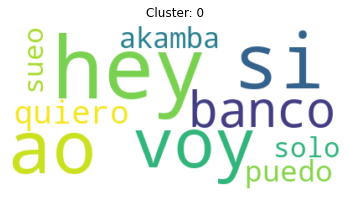

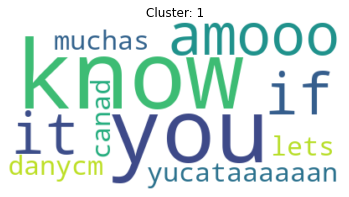

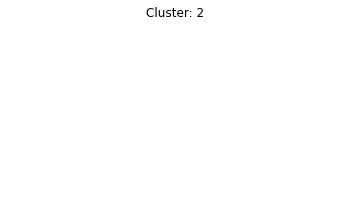

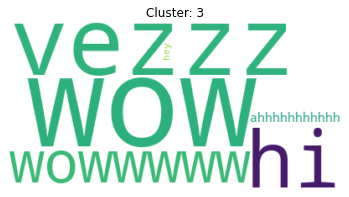

In [39]:
for i in range(len(topics)):
    try:
        topic = model.get_topic(i)
        frequencies = dict()
        for key, value in topic:
            frequencies[key] = value
        plt.title(f"Cluster: {i}")
        display_worldcloud(frequencies, "hey-ig-bert-" + str(i))
    except:
        continue

In [40]:
vectorizer = TfidfVectorizer(
    lowercase=True,
    max_features=500,
    max_df=0.3,
    min_df=3,
    ngram_range = (1,3),
    stop_words = stop  
)

vectors = vectorizer.fit_transform(df_hey_ig["clean_tweet"])
feature_names = vectorizer.get_feature_names()

dense = vectors.todense()
denselist=dense.tolist()

In [41]:
k = 3
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(vectors)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print(f"\nCluster {i}")
    for ind in order_centroids[i, :15]:
        print('%s' % terms[ind], end=', ')



Cluster 0
lamar, kendrick lamar, kendrick, humble kendrick lamar, humble kendrick, humble, akamba voy bailar, entrar, gane, ganar, ganan, física, fotos, final, festival, 
Cluster 1
hey, si, cdmx, año, banco, voy, solo, app, sueño, bien, jajaja, akamba, puedo, hacer, súper, 
Cluster 2
quiero, quiero ir, ir, tarjeta, creo, ganar, metálica, nunca, ver, sueño, tarjeta cassete, cassete, ahora, mejor, dónde, 

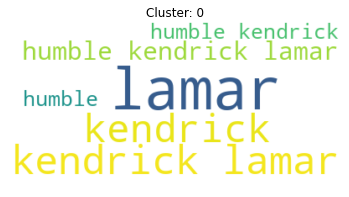

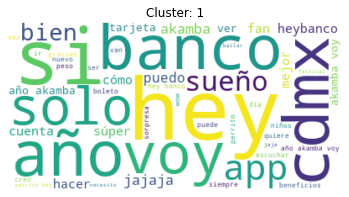

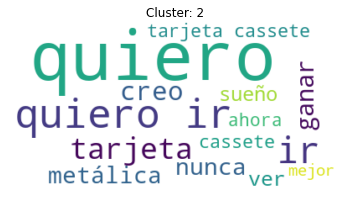

In [42]:
# Set the numbers of cluster
K=3
centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(K):
    frequencies = get_cluster_frequencies(i)
    if frequencies:
        plt.title(f"Cluster: {i}")
        display_worldcloud(frequencies, "hey-ig-kmeans-"+str(i))

## Hey, Banco X

In [43]:
df_hey_x = pd.read_csv("data.csv")
df_hey_x.head()

,date,time,tweet
0,2023-01-01,NaN,"Resuelto, muchísimas gracias , excelente servi..."
1,2023-01-02,NaN,"Muchas gracias, espero su dm"
2,2023-01-02,NaN,Muchas gracias!
3,2023-01-02,NaN,Algo similar me paso. Quería renovar mi token ...
4,2023-01-02,NaN,Yeeeei! a través de mi cuenta en acabo de cont...


In [44]:
df_hey_x = df_hey_x.drop('time', axis=1)
df_hey_x = df_hey_x.dropna()
df_hey_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    812 non-null    object
 1   tweet   812 non-null    object
dtypes: object(2)
memory usage: 12.8+ KB


In [45]:
df_hey_x['tweet'] = df_hey_x['tweet'].astype('str').str.lower()
df_hey_x['tweet'] = df_hey_x.apply(lambda row: emoji_pattern.sub(r'', row['tweet']), axis=1)
df_hey_x.head()

,date,tweet
0,2023-01-01,"resuelto, muchísimas gracias , excelente servi..."
1,2023-01-02,"muchas gracias, espero su dm"
2,2023-01-02,muchas gracias!
3,2023-01-02,algo similar me paso. quería renovar mi token ...
4,2023-01-02,yeeeei! a través de mi cuenta en acabo de cont...


In [46]:
df_hey_x["clean_tweet"] = df_hey_x["tweet"].apply(remove_stopwords_punc)
df_hey_x.head()

,date,tweet,clean_tweet
0,2023-01-01,"resuelto, muchísimas gracias , excelente servi...",resuelto muchísimas gracias excelente servici...
1,2023-01-02,"muchas gracias, espero su dm",muchas gracias espero dm
2,2023-01-02,muchas gracias!,muchas gracias
3,2023-01-02,algo similar me paso. quería renovar mi token ...,similar paso quería renovar token poder hacer ...
4,2023-01-02,yeeeei! a través de mi cuenta en acabo de cont...,yeeeei través cuenta acabo contratar cuenta ah...


In [47]:
model = BERTopic(verbose= True)
docs = df_hey_x['clean_tweet'].to_list() 
topics, probabilities = model.fit_transform(docs)

2024-05-05 11:13:32,420 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/26 [00:00<?, ?it/s]

2024-05-05 11:13:38,114 - BERTopic - Embedding - Completed ✓
2024-05-05 11:13:38,116 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-05-05 11:13:42,521 - BERTopic - Dimensionality - Completed ✓
2024-05-05 11:13:42,523 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-05-05 11:13:42,563 - BERTopic - Cluster - Completed ✓
2024-05-05 11:13:42,568 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-05-05 11:13:42,600 - BERTopic - Representation - Completed ✓


In [48]:
model.visualize_barchart()

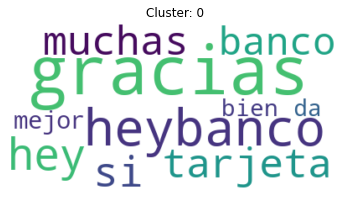

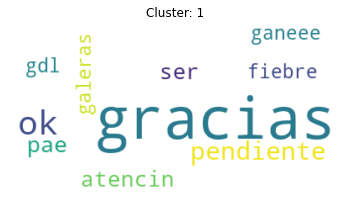

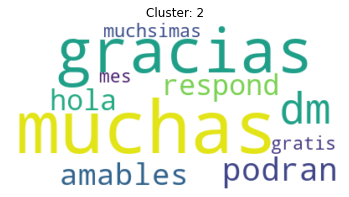

In [49]:
for i in range(len(topics)):
    try:
        topic = model.get_topic(i)
        frequencies = dict()
        for key, value in topic:
            frequencies[key] = value
        plt.title(f"Cluster: {i}")
        display_worldcloud(frequencies, "hey-x-bert-" + str(i))
    except:
        continue

In [50]:
vectorizer = TfidfVectorizer(
    lowercase=True,
    max_features=500,
    max_df=0.3,
    min_df=3,
    ngram_range = (1,3),
    stop_words = stop  
)

vectors = vectorizer.fit_transform(df_hey_x["clean_tweet"])
feature_names = vectorizer.get_feature_names()

dense = vectors.todense()
denselist=dense.tolist()

In [51]:
k = 3
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(vectors)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print(f"\nCluster {i}")
    for ind in order_centroids[i, :15]:
        print('%s' % terms[ind], end=', ')



Cluster 0
muchas, muchas gracias, si, heybanco, hey, bien, mejor, tarjeta, banco, hola, excelente, bueno, saludos, app, cuenta, 
Cluster 1
cómo, garantizada, funciona, aún, semana, duda, excelente, tarjeta, débito, día, día hoy, electrónico, días, dónde, efectivo, 
Cluster 2
listo, listo gracias, muchas gracias, muchas, mandé, hice, saludos, quedó, electrónico, eh, efectivo supermercados, efectivo, dónde, días, día hoy gane, 

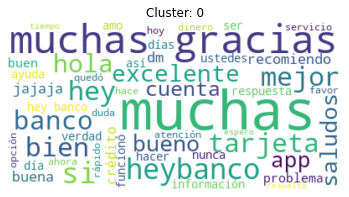

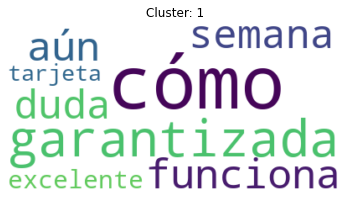

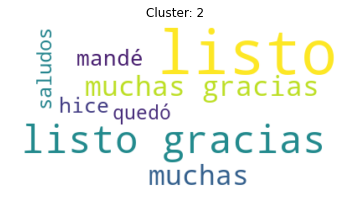

In [52]:
# Set the numbers of cluster
K=3
centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()


for i in range(K):
    frequencies = get_cluster_frequencies(i)
    if frequencies:
        plt.title(f"Cluster: {i}")
        display_worldcloud(frequencies, "hey-x-kmeans-"+str(i))

### nu

In [53]:
df_nu = pd.read_csv("comentarios-nu.csv")
df_nu.head()

,Unnamed: 0,text
0,0,¿Cuándo van a tener un producto para menores d...
1,1,This is the way
2,2,Top!👏🚀🎉💜
3,3,Lo necesito 💜
4,4,Manifestando a la fuerza que me aumenten mi lí...


In [54]:
df_nu = df_nu.drop('Unnamed: 0', axis=1)
df_nu = df_nu.dropna()
df_nu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2344 entries, 0 to 2358
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2344 non-null   object
dtypes: object(1)
memory usage: 36.6+ KB


In [55]:
df_nu['text'] = df_nu['text'].astype('str').str.lower()
df_nu['tweet'] = df_nu.apply(lambda row: emoji_pattern.sub(r'', row['text']), axis=1)
df_nu.head()

,text,tweet
0,¿cuándo van a tener un producto para menores d...,¿cuándo van a tener un producto para menores d...
1,this is the way,this is the way
2,top!👏🚀🎉💜,top!
3,lo necesito 💜,lo necesito
4,manifestando a la fuerza que me aumenten mi lí...,manifestando a la fuerza que me aumenten mi lí...


In [56]:
df_nu["clean_tweet"] = df_nu["tweet"].apply(remove_stopwords_punc)
df_nu.head()

,text,tweet,clean_tweet
0,¿cuándo van a tener un producto para menores d...,¿cuándo van a tener un producto para menores d...,¿cuándo van tener producto menores edad urge
1,this is the way,this is the way,this is the way
2,top!👏🚀🎉💜,top!,top
3,lo necesito 💜,lo necesito,necesito
4,manifestando a la fuerza que me aumenten mi lí...,manifestando a la fuerza que me aumenten mi lí...,manifestando fuerza aumenten línea 🧙‍♂️🧙‍♂️🧙‍♂️


In [61]:
model = BERTopic(verbose= True)
docs = df_nu['clean_tweet'].to_list() 
topics, probabilities = model.fit_transform(docs)

2024-05-05 11:17:37,849 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/19 [00:00<?, ?it/s]

2024-05-05 11:17:43,486 - BERTopic - Embedding - Completed ✓
2024-05-05 11:17:43,487 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-05-05 11:17:46,827 - BERTopic - Dimensionality - Completed ✓
2024-05-05 11:17:46,828 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-05-05 11:17:46,849 - BERTopic - Cluster - Completed ✓
2024-05-05 11:17:46,853 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-05-05 11:17:46,870 - BERTopic - Representation - Completed ✓


In [62]:
model.visualize_barchart()

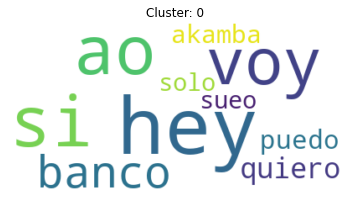

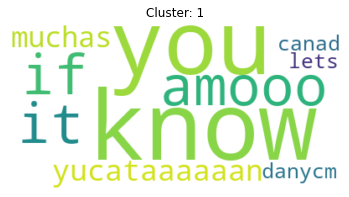

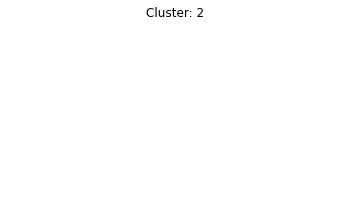

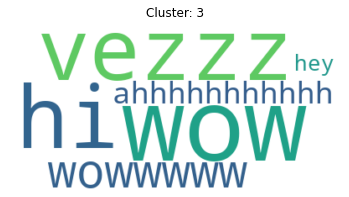

In [63]:
for i in range(len(topics)):
    try:
        topic = model.get_topic(i)
        frequencies = dict()
        for key, value in topic:
            frequencies[key] = value
        plt.title(f"Cluster: {i}")
        display_worldcloud(frequencies, "nu-bert-" + str(i))
    except:
        continue

In [64]:
vectorizer = TfidfVectorizer(
    lowercase=True,
    max_features=500,
    max_df=0.3,
    min_df=3,
    ngram_range = (1,3),
    stop_words = stop  
)

vectors = vectorizer.fit_transform(df_nu["clean_tweet"])
feature_names = vectorizer.get_feature_names()

dense = vectors.todense()
denselist=dense.tolist()

In [65]:
k = 3
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(vectors)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print(f"\nCluster {i}")
    for ind in order_centroids[i, :15]:
        print('%s' % terms[ind], end=', ')



Cluster 0
seguro, sirve, tener, dan, solo, si, escenario, entrar, dios, dónde, escuchar, evento, días, día, dos, 
Cluster 1
quiero, quiero ir, ir, tarjeta, creo, ganar, metálica, nunca, ver, sueño, tarjeta cassete, cassete, ahora, mejor, dónde, 
Cluster 2
hey, si, cdmx, año, banco, voy, app, sueño, bien, solo, jajaja, akamba, puedo, hacer, súper, 

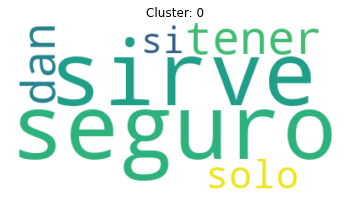

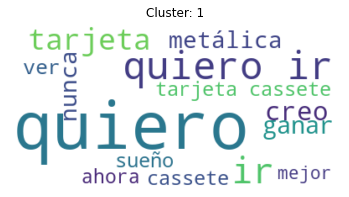

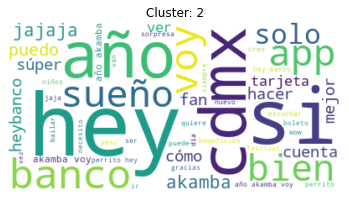

In [67]:
# Set the numbers of cluster
K=3
centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(K):
    frequencies = get_cluster_frequencies(i)
    if frequencies:
        plt.title(f"Cluster: {i}")
        display_worldcloud(frequencies, 'nu-kmeans'+str(i))

In [77]:
model = BERTopic(verbose= True)
docs = df_nu['clean_tweet'].to_list() 
topics, probabilities = model.fit_transform(docs)

2024-05-05 11:22:12,094 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/19 [00:00<?, ?it/s]

2024-05-05 11:22:17,146 - BERTopic - Embedding - Completed ✓
2024-05-05 11:22:17,146 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-05-05 11:22:20,475 - BERTopic - Dimensionality - Completed ✓
2024-05-05 11:22:20,476 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-05-05 11:22:20,501 - BERTopic - Cluster - Completed ✓
2024-05-05 11:22:20,504 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-05-05 11:22:20,521 - BERTopic - Representation - Completed ✓


In [78]:
model.visualize_barchart()

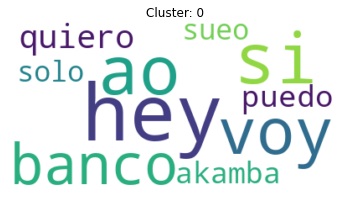

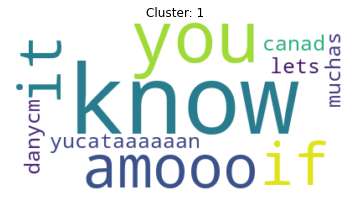

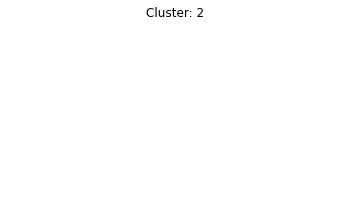

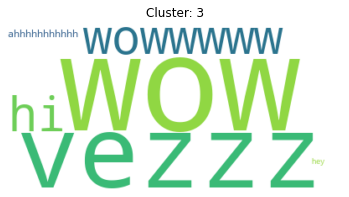

In [79]:
for i in range(len(topics)):
    try:
        topic = model.get_topic(i)
        frequencies = dict()
        for key, value in topic:
            frequencies[key] = value
        plt.title(f"Cluster: {i}")
        display_worldcloud(frequencies, "nu -bert" + str(i))
    except:
        continue

In [80]:
vectorizer = TfidfVectorizer(
    lowercase=True,
    max_features=500,
    max_df=0.3,
    min_df=3,
    ngram_range = (1,3),
    stop_words = stop  
)

vectors = vectorizer.fit_transform(df_nu["clean_tweet"])
feature_names = vectorizer.get_feature_names()

dense = vectors.todense()
denselist=dense.tolist()

In [81]:
k = 7
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(vectors)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print(f"\nCluster {i}")
    for ind in order_centroids[i, :15]:
        print('%s' % terms[ind], end=', ')


Cluster 0
quiero, si, año, sueño, voy, jajaja, akamba, solo, tarjeta, app, bien, ir, mejor, súper, banco, 
Cluster 1
cdmx, hidalgo, hacer, área, dos, final, festival, fan, evento, escuchar, escenario, entrar, dónde, días, día, 
Cluster 2
cómo, hago, niños, acceso, pro, nuevo, fan, cuenta, akambamx voy, gane, ganan, física, fotos, final, festival, 
Cluster 3
hey, hey banco, perrito hey, perrito, banco, puedo, entrar, si, pro, fan, quiere, hey quiere, perrito hey quiere, tener, correo, 
Cluster 4
mas, solo, voy, disfrutar, final, festival, fan, evento, escuchar, escenario, entrar, dónde, días, día, dos, 
Cluster 5
huasteca potosina, potosina, huasteca, huasca, hidalgo, escenario, día, días, dónde, entrar, área, escuchar, disponible, evento, fan, 
Cluster 6
lamar, kendrick lamar, kendrick, humble kendrick lamar, humble kendrick, humble, akamba voy bailar, entrar, gane, ganar, ganan, física, fotos, final, festival, 

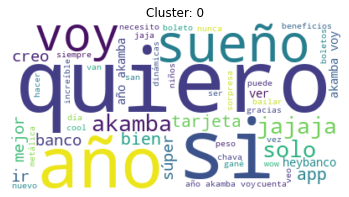

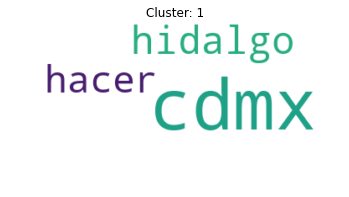

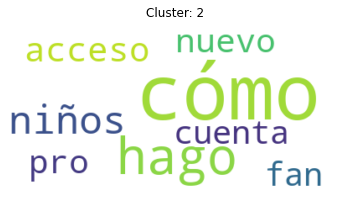

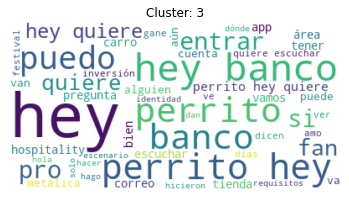

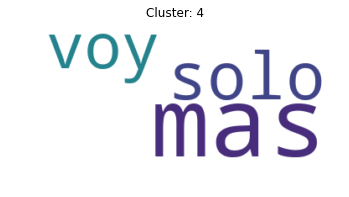

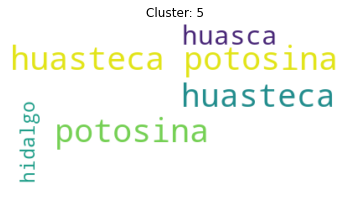

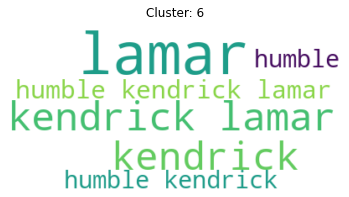

In [82]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Set the numbers of cluster
K=7
centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(K):
    frequencies = get_cluster_frequencies(i)
    if frequencies:
        plt.title(f"Cluster: {i}")
        display_worldcloud(frequencies, "nu-kmeans"+str(i))